## Do the following on titanic dataset 
1. Load the dataset into python environment 
2. Do all the necessary pre-processing steps 
3. Create kNN and SVM models 
4. Do k-fold and stratified k-fold cross validation techniques and find the average accuracy score of the models

#### 1. Load the dataset into python environment

In [147]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
titanic_data=pd.read_csv('titanic_dataset .csv')

In [149]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [150]:
#Basic information
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
#statistical information
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2. Do all the necessary pre-processing steps

In [152]:
#Checking missing values
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
#filling missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)


In [154]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [155]:
#Adding a new Feature
titanic_data['family_size']=titanic_data.SibSp+titanic_data.Parch+1

In [156]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


C:\Users\sumy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


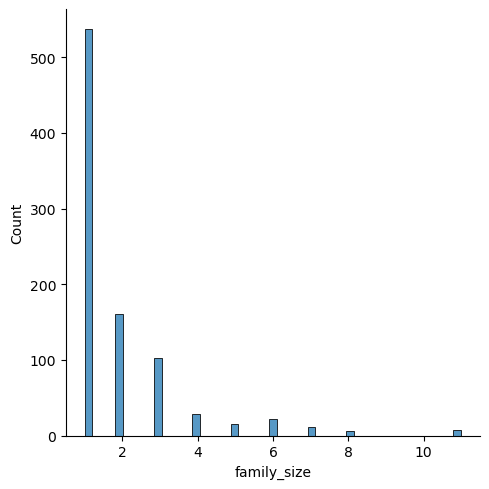

In [157]:
sns.displot(titanic_data.family_size)

In [158]:
#we do not use Cabin variable .so it is drop in the dataset
titanic_data.drop('Cabin',inplace=True,axis=1)

In [159]:
titanic_data.dropna(inplace=True)

In [160]:
#sex and embarked are categorical features.we will use dummmy variables instead of these ones.
sex=pd.get_dummies(titanic_data.Sex,drop_first=True)

In [161]:
embark=pd.get_dummies(titanic_data.Embarked,drop_first=True)

In [162]:
titanic_data=pd.concat([titanic_data,sex,embark],axis=1)

In [163]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,True,False,True


In [164]:
titanic_data.drop(['Name','PassengerId','Sex','Ticket','Embarked','SibSp'], axis=1, inplace=True)

In [165]:
titanic_data.head()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
0,0,3,22.0,0,7.2500,2,True,False,True
1,1,1,38.0,0,71.2833,2,False,False,False
2,1,3,26.0,0,7.9250,1,False,False,True
3,1,1,35.0,0,53.1000,2,False,False,True
4,0,3,35.0,0,8.0500,1,True,False,True


In [166]:
titanic_data.corr()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
Survived,1.000000,-0.338481,-0.064910,0.081629,0.257307,0.016639,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.339898,0.018443,-0.549500,0.065997,0.131900,0.221009,0.074053
Age,-0.064910,-0.339898,1.000000,-0.172482,0.096688,-0.245619,0.081163,-0.031415,-0.006729
Parch,0.081629,0.018443,-0.172482,1.000000,0.216225,0.783111,-0.245489,-0.081228,0.060814
Fare,0.257307,-0.549500,0.096688,0.216225,1.000000,0.217138,-0.182333,-0.117216,-0.162184
family_size,0.016639,0.065997,-0.245619,0.783111,0.217138,1.000000,-0.200988,-0.058592,0.077359
male,-0.543351,0.131900,0.081163,-0.245489,-0.182333,-0.200988,1.000000,-0.074115,0.119224
Q,0.003650,0.221009,-0.031415,-0.081228,-0.117216,-0.058592,-0.074115,1.000000,-0.499421
S,-0.149683,0.074053,-0.006729,0.060814,-0.162184,0.077359,0.119224,-0.499421,1.000000


<Axes: >

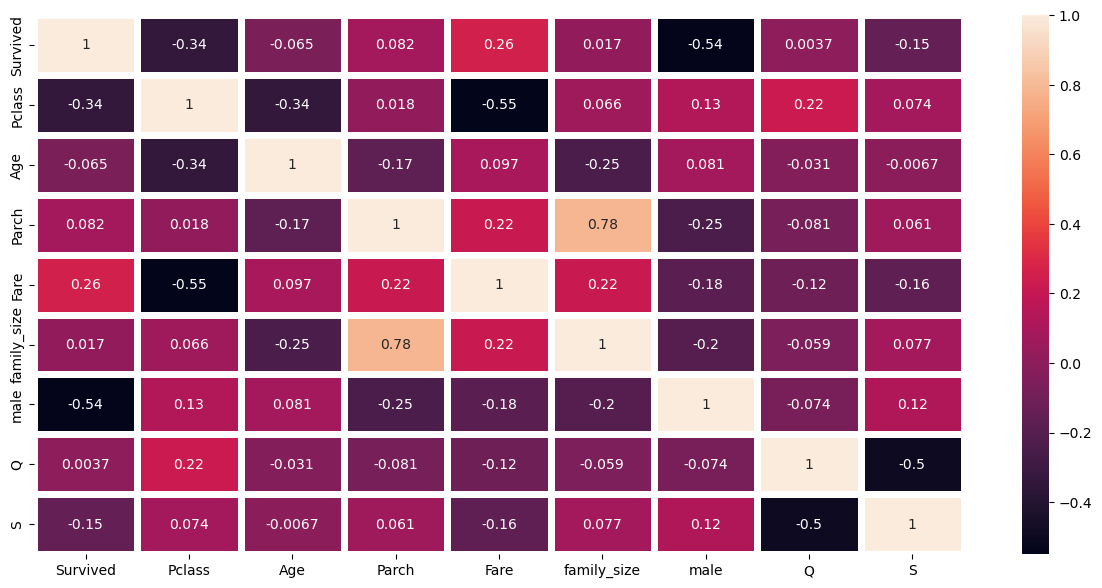

In [167]:
plt.figure(figsize=(15,7))
sns.heatmap(titanic_data.corr(),linewidths=5,annot=True)

#### 3.  Create kNN and SVM models

In [168]:
y=titanic_data.Survived
X=titanic_data.drop('Survived',axis=1)

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

##### KNN Model

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
metric_k=[]
neighbors=np.arange(3,15)

In [171]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    classifier.fit(X_train,y_train)
    knn_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,knn_pred)
    metric_k.append(accuracy)

In [172]:
print(confusion_matrix(y_test,knn_pred))

[[105  29]
 [ 38  51]]


In [173]:
print('Accuracy:',accuracy_score(y_test,knn_pred))

Accuracy: 0.6995515695067265


##### SVM Model

In [174]:
from sklearn.svm import SVC
sv_clf=SVC()
sv_clf.fit(X_train,y_train)

SVC()

In [175]:
y_pred=sv_clf.predict(X_test)

In [176]:
print(confusion_matrix(y_test,y_pred))

[[125   9]
 [ 66  23]]


In [177]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.6636771300448431


##### 4. Do k-fold and  stratified k-fold cross validation techniques and find the average accuracy score of the models

In [178]:
#K-Fold of KNN Model

In [179]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [180]:
for train_index,test_index in kfold_validator.split(X,y):
        print('Training index:',train_index)
        print('Testing index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [181]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score( classifier,X,y,cv=kfold_validator)
cv_result

array([0.61111111, 0.71910112, 0.71910112, 0.6741573 , 0.69662921,
       0.73033708, 0.68539326, 0.74157303, 0.71910112, 0.80898876])

In [182]:
cv_result.mean()

0.7105493133583021

In [183]:
#Stratified k-fold of KNN model

In [184]:
from sklearn.model_selection import StratifiedKFold
strat_validator=StratifiedKFold(n_splits=10)

In [185]:
for train_index,test_index in strat_validator.split(X,y):
        print('Training index:',train_index)
        print('Testing index:',test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [186]:
skr_cv_result=cross_val_score(classifier,X,y,cv=strat_validator)
skr_cv_result

array([0.61111111, 0.6741573 , 0.70786517, 0.70786517, 0.71910112,
       0.71910112, 0.73033708, 0.73033708, 0.68539326, 0.79775281])

In [187]:
skr_cv_result.mean()

0.7083021223470662

In [188]:
#k-fold of SNM Model

In [189]:
from sklearn.model_selection import KFold
kfold_validator1=KFold(10)

In [190]:
for train_index,test_index in kfold_validator1.split(X,y):
        print('Training index:',train_index)
        print('Testing index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [191]:
from sklearn.model_selection import cross_val_score
cv_result1=cross_val_score(sv_clf,X,y,cv=kfold_validator1)
cv_result1

array([0.58888889, 0.6741573 , 0.66292135, 0.6741573 , 0.65168539,
       0.70786517, 0.65168539, 0.74157303, 0.73033708, 0.69662921])

In [192]:
cv_result1.mean()

0.6779900124843945

In [193]:
#Stratified k-fold of SVM Model
from sklearn.model_selection import StratifiedKFold
strat_validator1=StratifiedKFold(n_splits=10)

In [194]:
for train_index,test_index in strat_validator1.split(X,y):
        print('Training index:',train_index)
        print('Testing index:',test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [195]:
skr_cv_result1=cross_val_score(sv_clf,X,y,cv=strat_validator)
skr_cv_result1

array([0.6       , 0.57303371, 0.68539326, 0.74157303, 0.69662921,
       0.69662921, 0.68539326, 0.71910112, 0.70786517, 0.6741573 ])

In [196]:
skr_cv_result1.mean()

0.6779775280898876

# Observations
1.The KNN model is the best model on comparing SVM model.Because we get better accuracy(0.69) comparing SVM model.

2.In KNN model average accuracy score greater in k-fold validation on comapring SVM model.Also,the Stratified k-fold average score is greater in KNN model.